Importing the libaries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [57]:
path_of_file = "C:\\Users\\mayan\\Downloads\\zomato.csv\\zomato.csv"
df = pd.read_csv(path_of_file, encoding='ISO-8859-1')

In [59]:
import re

def has_garbage(text):
    return bool(re.search(r'[^\x00-\x7F]', str(text)))  # non-ASCII

garbage_rows = df[df.apply(lambda row: any(has_garbage(val) for val in row), axis=1)]
print(f"Found {len(garbage_rows)} rows with non-ASCII characters")


Found 246 rows with non-ASCII characters


In [60]:
df = df[~df.index.isin(garbage_rows.index)]


In [61]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")
    print(f"Unique values in {col}: {df[col].nunique()}")
    print("-----------------------------")


restaurant_id: int64
Unique values in restaurant_id: 9551
-----------------------------
restaurant_name: object
Unique values in restaurant_name: 7446
-----------------------------
country_code: int64
Unique values in country_code: 15
-----------------------------
city: object
Unique values in city: 141
-----------------------------
address: object
Unique values in address: 8918
-----------------------------
locality: object
Unique values in locality: 1208
-----------------------------
locality_verbose: object
Unique values in locality_verbose: 1265
-----------------------------
longitude: float64
Unique values in longitude: 8120
-----------------------------
latitude: float64
Unique values in latitude: 8677
-----------------------------
cuisines: object
Unique values in cuisines: 1825
-----------------------------
average_cost_for_two: int64
Unique values in average_cost_for_two: 140
-----------------------------
currency: object
Unique values in currency: 12
-------------------------

In [9]:
df["restaurant_name"].nunique()

7446

the total no of restaurant id 9551 and the total restaurent name is 7446 so that there are some restaurent which may using same name or may false infomation

In [10]:
df["restaurant_name"].value_counts().head(5)

restaurant_name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

There no false infomation its just franchise of the brand like Domino's , Subway etc.

In [11]:
df["country_code"].value_counts()

country_code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [12]:
df.groupby("country_code")["currency"].value_counts().sort_values(ascending=False)

country_code  currency              
1             Indian Rupees(Rs.)        8652
216           Dollar($)                  434
215           Pounds(£)                  80
30            Brazilian Real(R$)          60
189           Rand(R)                     60
214           Emirati Diram(AED)          60
148           NewZealand($)               40
208           Turkish Lira(TL)            34
14            Dollar($)                   24
162           Botswana Pula(P)            22
94            Indonesian Rupiah(IDR)      21
166           Qatari Rial(QR)             20
184           Dollar($)                   20
191           Sri Lankan Rupee(LKR)       20
37            Dollar($)                    4
Name: count, dtype: int64

By this table we can clearly see the country currency by map the data we can create new column 

In [13]:
map_country = {
    1: "India",
    216: "United States",
    215: "United Kingdom",
    30: "Brazil",
    189: "South Africa",
    214: "United Arab Emirates",
    148: "New Zealand",
    208: "Turkey",
    14: "Australia",
    162: "philippines",
    94: "Indonesia",
    166: "Qatar",
    184: "Singapore",
    191: "Sri Lanka",
    37: "Canada"
}
df["country"] = df["country_code"].map(map_country)

In [14]:
df["country"].isnull().sum()

0

There some recodes with missing and null values but not marks as nun, so by using replace we can map 

In [44]:
df = df.replace({"NAN" : np.nan, "NaN": np.nan, "nan": np.nan})

In [15]:
df.dropna(inplace=True)

In [16]:
df["currency"] =df["currency"].replace({"Botswana Pula(P)":"peso"})

In [17]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,philippines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,philippines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,philippines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,philippines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,philippines


In [18]:
df["longitude"].nunique() , df["latitude"].nunique()

(8111, 8668)

In [19]:
df["longitude"].value_counts() 

longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.134037      1
77.228705      1
77.230456      1
77.229064      1
29.026016      1
Name: count, Length: 8111, dtype: int64

In [20]:
df["latitude"].value_counts()

latitude
0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.641341      1
28.644472      1
28.648229      1
28.644812      1
40.984776      1
Name: count, Length: 8668, dtype: int64

so there are some 0.0000 longitude and latitude we will try to fix it


In [21]:
print(f"Only {df[(df["longitude"] == 0.000000) & (df["country"] != "India")].shape[0]} restaurents in other countries have longitude 0.000000.")
print(f"There are {df[(df['longitude'] == 0.000000) & (df['country'] == 'India')].shape[0]} rows with longitude 0.000000 in India.")

Only 2 restaurents in other countries have longitude 0.000000.
There are 496 rows with longitude 0.000000 in India.


In [22]:
print(f"There are {df[df["country"] == 'India'].shape[0]} total restaurants in india.")

There are 8652 total restaurants in india.


So there are 498 restaurents having 0.000 values so we can drop them

In [23]:
df.drop(df[df["longitude"] == 0.000000].index, inplace=True)

In [24]:
df.shape

(9044, 22)

In [25]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,philippines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,philippines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,philippines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,philippines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,philippines


In [26]:
df["cuisines"].nunique()

1754

In [27]:
df["cuisines"].value_counts().head(10)

cuisines
North Indian                      877
North Indian, Chinese             477
Chinese                           337
Fast Food                         334
North Indian, Mughlai             322
Cafe                              280
Bakery                            193
North Indian, Mughlai, Chinese    190
Bakery, Desserts                  147
Street Food                       139
Name: count, dtype: int64

In [28]:
df["price_range"].value_counts()

price_range
1    4152
2    2965
3    1357
4     570
Name: count, dtype: int64

In [29]:
df["average_cost_for_two"].value_counts()

average_cost_for_two
500       831
300       825
400       791
200       639
600       618
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 139, dtype: int64

C:\Users\mayan\AppData\Local\Temp\ipykernel_15812\1930330978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="average_cost_for_two", data=df, palette="Set2")


<Axes: xlabel='average_cost_for_two'>

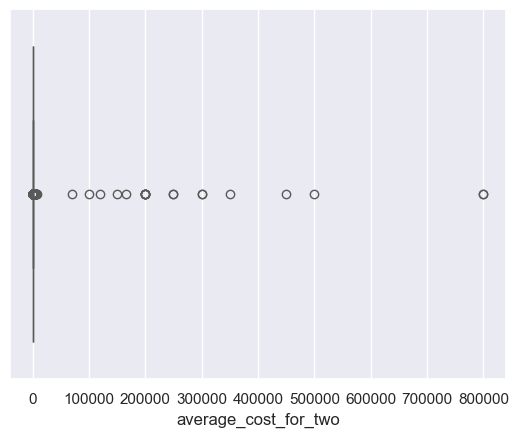

In [136]:
sns.boxplot(x="average_cost_for_two", data=df, palette="Set2")

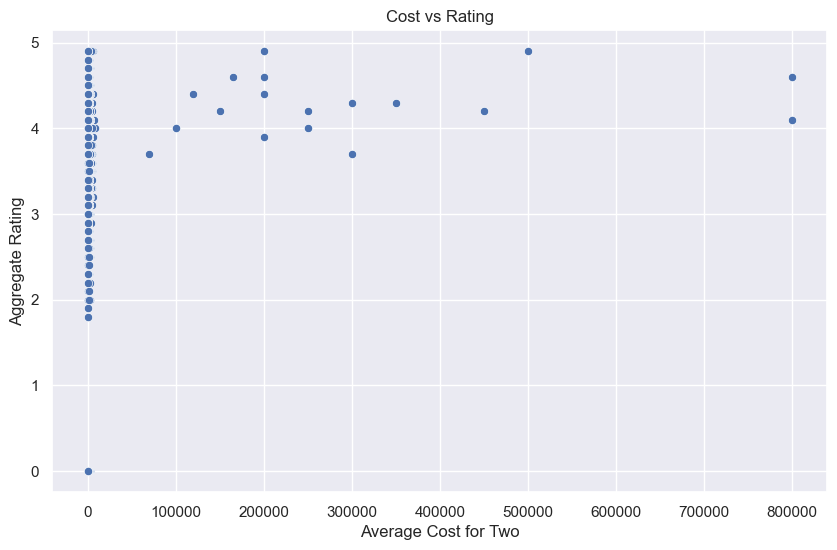

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_cost_for_two', y='aggregate_rating')
plt.title('Cost vs Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()


In [30]:
df[df["average_cost_for_two"].between(100000, 800000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,No,No,No,No,3,4.2,Green,Very Good,22,Indonesia
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,No,No,No,No,3,4.0,Green,Very Good,1159,Indonesia
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,1662,Indonesia
9280,7405789,Toodz House,94,Jakarta,"Jl. Cipete Raya No. 79, Fatmawati, Jakarta",Fatmawati,"Fatmawati, Jakarta",106.801782,-6.278012,"Cafe, Italian, Coffee and Tea, Western, Indone...",...,No,No,No,No,3,4.6,Dark Green,Excellent,1476,Indonesia
9281,18425821,OJJU,94,Jakarta,"Gandaria City, Lantai Upper Ground, Jl. Sultan...","Gandaria City Mall, Gandaria","Gandaria City Mall, Gandaria, Jakarta",106.783162,-6.244221,Korean,...,No,No,No,No,3,3.9,Yellow,Good,137,Indonesia
9282,7422751,Union Deli,94,Jakarta,"Grand Indonesia Mall, Lantai Ground, East Mall...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.819749,-6.197150,"Desserts, Bakery, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,903,Indonesia
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia
9285,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,259,Indonesia
9286,7400818,Zenbu,94,Jakarta,"Kota Kasablanka, Lantai Upper Ground, Food Soc...","Kota Kasablanka, Tebet","Kota Kasablanka, Tebet, Jakarta",106.842500,-6.224333,"Japanese, Sushi, Ramen",...,No,No,No,No,3,4.4,Green,Very Good,841,Indonesia


In [31]:
x= df.groupby("currency")["average_cost_for_two"].describe()
x.shape
x

,count,mean,std,min,25%,50%,75%,max
currency,,,,,,,,
Brazilian Real(R$),60.0,134.666667,86.831547,30.0,70.00,100.0,177.5,400.0
Dollar($),473.0,31.792812,42.160802,0.0,10.00,25.0,40.0,500.0
Emirati Diram(AED),60.0,166.416667,109.969532,40.0,88.75,145.0,235.0,500.0
Indian Rupees(Rs.),8156.0,632.133399,606.797574,0.0,300.00,500.0,700.0,8000.0
Indonesian Rupiah(IDR),20.0,290250.000000,204440.668269,70000.0,191250.00,200000.0,312500.0,800000.0
NewZealand($),40.0,69.750000,37.824663,20.0,50.00,60.0,90.0,200.0
Pounds(£),80.0,47.812500,34.520621,10.0,30.00,40.0,55.0,230.0
Qatari Rial(QR),20.0,223.750000,147.905331,50.0,107.50,185.0,262.5,550.0
Rand(R),60.0,419.733333,422.196069,110.0,250.00,340.0,450.0,3210.0


In [32]:
currency_rates = {
    'Indian Rupees(Rs.)': 1,
    'Dollar($)': 85,                
    'Emirati Diram(AED)': 23,
    'Brazilian Real(R$)': 15,
    'Indonesian Rupiah(IDR)': 0.0052,
    'NewZealand($)': 51,
    'Pounds(£)': 105,
    'Qatari Rial(QR)': 22.8,
    'Rand(R)': 4.5,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.5,
    'peso': 4.9  
}
df["average_cost_for_two_in_rs"] = df.apply(lambda x : x["average_cost_for_two"]* currency_rates.get(x["currency"], 1), axis=1)

In [33]:
df["average_cost_for_two_in_rs"].describe()

count     9044.000000
mean       814.779578
std       1306.840871
min          0.000000
25%        300.000000
50%        500.000000
75%        850.000000
max      42500.000000
Name: average_cost_for_two_in_rs, dtype: float64

In [34]:
df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,average_cost_for_two_in_rs
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,philippines,5390.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,philippines,5880.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,philippines,19600.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,philippines,7350.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,philippines,7350.0


In [69]:
df.reset_index(inplace=True, drop=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9296 non-null   int64  
 1   Restaurant Name       9296 non-null   object 
 2   Country Code          9296 non-null   int64  
 3   City                  9296 non-null   object 
 4   Address               9296 non-null   object 
 5   Locality              9296 non-null   object 
 6   Locality Verbose      9296 non-null   object 
 7   Longitude             9296 non-null   float64
 8   Latitude              9296 non-null   float64
 9   Cuisines              9296 non-null   object 
 10  Average Cost for two  9296 non-null   int64  
 11  Currency              9296 non-null   object 
 12  Has Table booking     9296 non-null   object 
 13  Has Online delivery   9296 non-null   object 
 14  Is delivering now     9296 non-null   object 
 15  Switch to order menu 

In [67]:
df.dropna(inplace = True)

In [73]:
df.to_csv("zomato_cleaned.csv", index=False)